# Breast cancer prediction model

In [1]:
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

breastCancerDf = pd.read_csv("breast-cancer-wisconsin.csv", encoding='latin')
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.3f}'.format

breastCancerDf.columns = ['ID', 'clump_thickness', 'uniformity_of_cell_size',
                          'uniformity_of_cell_shape', 'marginal_adhesion', 
                          'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
                          'normal_nucleoli', 'mitoses', 'class']

breastCancerDf.describe()

,ID,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,698.000,698.000,698.000,698.000,698.000,698.000,698.000,698.000,698.000,698.000
mean,1071806.791,4.417,3.138,3.211,2.809,3.218,3.438,2.870,1.590,2.691
std,617532.274,2.818,3.053,2.973,2.857,2.215,2.440,3.055,1.716,0.952
min,61634.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000
25%,870258.250,2.000,1.000,1.000,1.000,2.000,2.000,1.000,1.000,2.000
50%,1171710.000,4.000,1.000,1.000,1.000,2.000,3.000,1.000,1.000,2.000
75%,1238354.000,6.000,5.000,5.000,4.000,4.000,5.000,4.000,1.000,4.000
max,13454352.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,4.000


   This breast cancer databases was obtained from the University of Wisconsin
    Hospitals, Madison from Dr. William H. Wolberg.
   
   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).

# Data preparation

**Display a correlation matrix**

In [2]:
breastCancerDf.corr()

,ID,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
ID,1.000,-0.055,-0.042,-0.042,-0.065,-0.046,-0.060,-0.052,-0.035,-0.080
clump_thickness,-0.055,1.000,0.645,0.655,0.487,0.522,0.559,0.536,0.350,0.717
uniformity_of_cell_size,-0.042,0.645,1.000,0.907,0.705,0.752,0.756,0.723,0.459,0.818
uniformity_of_cell_shape,-0.042,0.655,0.907,1.000,0.683,0.720,0.736,0.719,0.439,0.819
marginal_adhesion,-0.065,0.487,0.705,0.683,1.000,0.599,0.667,0.603,0.417,0.697
single_epithelial_cell_size,-0.046,0.522,0.752,0.720,0.599,1.000,0.616,0.629,0.479,0.683
bland_chromatin,-0.060,0.559,0.756,0.736,0.667,0.616,1.000,0.666,0.344,0.757
normal_nucleoli,-0.052,0.536,0.723,0.719,0.603,0.629,0.666,1.000,0.428,0.712
mitoses,-0.035,0.350,0.459,0.439,0.417,0.479,0.344,0.428,1.000,0.423
class,-0.080,0.717,0.818,0.819,0.697,0.683,0.757,0.712,0.423,1.000


**Make a 'class' feature as binary (0 -> benign, 1 -> malignant)**

In [3]:
brCancer = breastCancerDf.copy(deep=True)
brCancer['class'] = np.where(breastCancerDf['class'] > 3, 1, 0)
brCancer['class']

0      0
1      0
2      0
3      0
4      1
      ..
693    0
694    0
695    1
696    1
697    1
Name: class, Length: 698, dtype: int64

**Convert values in 'bare_nuclei' column to int**

In [4]:
# Convert str to numeric
brCancer['bare_nuclei'] = pd.to_numeric(breastCancerDf['bare_nuclei'], errors='coerce')
brCancer['bare_nuclei']

0     10.000
1      2.000
2      4.000
3      1.000
4     10.000
       ...  
693    2.000
694    1.000
695    3.000
696    4.000
697    5.000
Name: bare_nuclei, Length: 698, dtype: float64

In [5]:
# Drop rows with missing values in 'bare_nuclei' column
a = len(breastCancerDf['bare_nuclei'])
for i in brCancer['bare_nuclei'].values:
    if i >= 0:
        a -= 1
print("Number of NaN values in 'bare_nuclei' column: ", a)

brCancer.dropna(axis=0, how='any', inplace=True)

Number of NaN values in 'bare_nuclei' column:  16


In [6]:
# Convert to int 
brCancer['bare_nuclei'] = [int(x)  if x >= 0 else np.nan for x in brCancer['bare_nuclei']]
brCancer['bare_nuclei']

0      10
1       2
2       4
3       1
4      10
       ..
693     2
694     1
695     3
696     4
697     5
Name: bare_nuclei, Length: 682, dtype: int64

In [7]:
brCancer.head()

,ID,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


# Validating input data

**Create a validation input data function**

In [8]:
def validate_data(input_data, schema):
    # Check values range and type
    for column in schema.keys():
        value_type = input_data[column].map(type) == schema[column]['dtype']
        if not value_type.all():
            raise TypeError("Invalid value type in column {}".format(column))
        else:
            value_min = schema[column]['min'] <= input_data[column].values 
            value_max = input_data[column].values <= schema[column]['max']
            if not value_min.all() or not value_max.all():
                raise ValueError("Value out of range in column {}".format(column))
    else:
        print("Input values are correct")

**Create a schema and validate input data**

In [9]:
schema = {'clump_thickness' : {'min' : 1, 'max' : 10, 'dtype' : int},
          'uniformity_of_cell_size' : {'min' : 1, 'max' : 10, 'dtype' : int},
          'uniformity_of_cell_shape' : {'min' : 1, 'max' : 10, 'dtype' : int},
          'marginal_adhesion' : {'min' : 1, 'max' : 10, 'dtype' : int},
          'single_epithelial_cell_size' : {'min' : 1, 'max' : 10, 'dtype' : int},
          'bare_nuclei' : {'min' : 1, 'max' : 10, 'dtype' : int},
          'bland_chromatin' : {'min' : 1, 'max' : 10, 'dtype' : int},    
          'normal_nucleoli' : {'min' : 1, 'max' : 10, 'dtype' : int},
          'mitoses' : {'min' : 1, 'max' : 10, 'dtype' : int},
          'class' : {'min' : 0, 'max' : 1, 'dtype' : int}}

validate_data(brCancer, schema)

Input values are correct


# Feature engineering

**Shuffle the dataset**

In [10]:
brCancer = brCancer.reindex(np.random.permutation(brCancer.index))

**Show historgam of raw values**

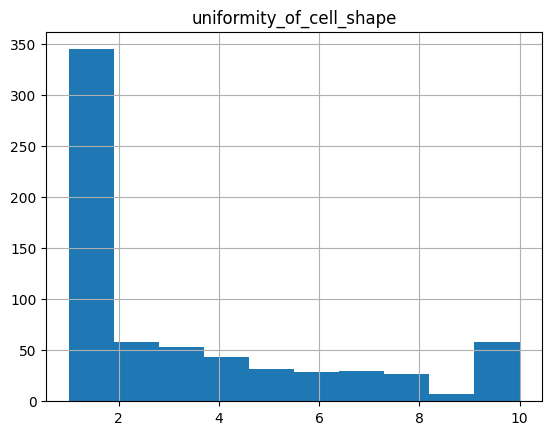

In [11]:
brCancer.hist(column='uniformity_of_cell_shape')
plt.show()

**Normalize feature to log scale**

In [12]:
# uniformity_of_cell_shape_log = pd.DataFrame(brCancer['uniformity_of_cell_shape'].values, 
#                                             columns=['uniformity_of_cell_shape'])
# uniformity_of_cell_shape_log = np.log10(uniformity_of_cell_shape_log)
# uniformity_of_cell_shape_log.hist(bins=20)
# plt.show()

**Normalize to range [0, 1]**

In [13]:
for col in schema.keys():
    if schema[col]['max'] != 0:
        brCancer[col] /= schema[col]['max']
        
brCancer['uniformity_of_cell_size']

477   0.200
347   0.400
682   0.100
512   0.100
134   0.100
       ... 
666   0.100
127   0.300
72    0.400
9     0.100
116   0.500
Name: uniformity_of_cell_size, Length: 682, dtype: float64

# Validating feature engineering

In [14]:
schema = {'clump_thickness' : {'min' : 0.1, 'max' : 1, 'dtype' : float},
          'uniformity_of_cell_size' : {'min' : 0.1, 'max' : 1, 'dtype' : float},
          'uniformity_of_cell_shape' : {'min' : 0.1, 'max' : 1, 'dtype' : float},
          'marginal_adhesion' : {'min' : 0.1, 'max' : 10, 'dtype' : float},
          'single_epithelial_cell_size' : {'min' : 0.1, 'max' : 1, 'dtype' : float},
          'bare_nuclei' : {'min' : 0.1, 'max' : 1, 'dtype' : float},
          'bland_chromatin' : {'min' : 0.1, 'max' : 1, 'dtype' : float},    
          'normal_nucleoli' : {'min' : 0.1, 'max' : 1, 'dtype' : float},
          'mitoses' : {'min' : 0.1, 'max' : 1, 'dtype' : float},
          'class' : {'min' : 0, 'max' : 1, 'dtype' : float}}

validate_data(brCancer, schema)

Input values are correct


# Creating feature columns

In [22]:
feature_column = []

# Three of the most correlated with 'class'
boundaries = [.2, .3, .4, .5, .6, .7, .8, .9, 1.0]
uoc_shape = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column('uniformity_of_cell_shape'),
    boundaries=boundaries)
feature_column.append(uoc_shape)

uoc_size = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column('uniformity_of_cell_size'),
    boundaries=boundaries)
feature_column.append(uoc_size)

bland_chromatin = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column('bland_chromatin'),
    boundaries=boundaries)
feature_column.append(bland_chromatin)

# Create input layer
feature_layer = tf.keras.layers.DenseFeatures(feature_column)

# Training model

**Split the dataset into a training and test set**

In [16]:
train_df = brCancer.sample(frac=0.8, random_state=1)
test_df = brCancer.drop(train_df.index, axis=0)

In [17]:
feature_layer(dict(train_df))

<tf.Tensor: shape=(546, 30), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>

In [18]:
train_features = {name : np.array(values) for name, values in train_df.items()}
train_labels = np.array(train_features.pop('class'))

test_features = {name : np.array(values) for name, values in test_df.items()}
test_labels = np.array(test_features.pop('class'))

**Establish a baseline**

In [19]:
x = train_df['uniformity_of_cell_shape'] > 0.3
y = train_df['class'] == 1
print('Lenght: {}, Sum: {}'.format(len(x), np.sum(x)))
print('Lenght: {}, Sum: {}'.format(len(y), np.sum(y)))

s = x == y
print('Lenght: {}, Sum: {}'.format(len(s), np.sum(s)))
print('Baseline accuracy: {}'.format(np.sum(s) / len(s)))

Lenght: 546, Sum: 178
Lenght: 546, Sum: 188
Lenght: 546, Sum: 502
Baseline accuracy: 0.9194139194139194


**Train a model**

Epoch 1/80
16/16 - 1s - loss: 2.5399 - accuracy: 0.7047 - precision: 0.8750 - recall: 0.1657 - val_loss: 2.3868 - val_accuracy: 0.6909 - val_precision: 1.0000 - val_recall: 0.1053 - 1s/epoch - 77ms/step
Epoch 2/80
16/16 - 0s - loss: 2.2883 - accuracy: 0.6884 - precision: 1.0000 - recall: 0.0947 - val_loss: 2.1764 - val_accuracy: 0.6727 - val_precision: 1.0000 - val_recall: 0.0526 - 67ms/epoch - 4ms/step
Epoch 3/80
16/16 - 0s - loss: 2.0886 - accuracy: 0.6782 - precision: 1.0000 - recall: 0.0651 - val_loss: 1.9863 - val_accuracy: 0.6727 - val_precision: 1.0000 - val_recall: 0.0526 - 65ms/epoch - 4ms/step
Epoch 4/80
16/16 - 0s - loss: 1.9068 - accuracy: 0.6884 - precision: 1.0000 - recall: 0.0947 - val_loss: 1.8126 - val_accuracy: 0.6909 - val_precision: 1.0000 - val_recall: 0.1053 - 64ms/epoch - 4ms/step
Epoch 5/80
16/16 - 0s - loss: 1.7386 - accuracy: 0.7108 - precision: 1.0000 - recall: 0.1598 - val_loss: 1.6505 - val_accuracy: 0.6909 - val_precision: 1.0000 - val_recall: 0.1053 - 65m

Epoch 27/80
16/16 - 0s - loss: 0.3713 - accuracy: 0.9450 - precision: 0.8737 - recall: 0.9822 - val_loss: 0.3170 - val_accuracy: 0.9818 - val_precision: 1.0000 - val_recall: 0.9474 - 63ms/epoch - 4ms/step
Epoch 28/80
16/16 - 0s - loss: 0.3647 - accuracy: 0.9430 - precision: 0.8691 - recall: 0.9822 - val_loss: 0.3096 - val_accuracy: 0.9818 - val_precision: 1.0000 - val_recall: 0.9474 - 59ms/epoch - 4ms/step
Epoch 29/80
16/16 - 0s - loss: 0.3589 - accuracy: 0.9430 - precision: 0.8691 - recall: 0.9822 - val_loss: 0.3084 - val_accuracy: 0.9818 - val_precision: 1.0000 - val_recall: 0.9474 - 60ms/epoch - 4ms/step
Epoch 30/80
16/16 - 0s - loss: 0.3538 - accuracy: 0.9450 - precision: 0.8737 - recall: 0.9822 - val_loss: 0.3006 - val_accuracy: 0.9818 - val_precision: 1.0000 - val_recall: 0.9474 - 61ms/epoch - 4ms/step
Epoch 31/80
16/16 - 0s - loss: 0.3494 - accuracy: 0.9450 - precision: 0.8737 - recall: 0.9822 - val_loss: 0.2979 - val_accuracy: 0.9818 - val_precision: 1.0000 - val_recall: 0.9474

Epoch 67/80
16/16 - 0s - loss: 0.2733 - accuracy: 0.9532 - precision: 0.9056 - recall: 0.9645 - val_loss: 0.2343 - val_accuracy: 0.9818 - val_precision: 1.0000 - val_recall: 0.9474 - 60ms/epoch - 4ms/step
Epoch 68/80
16/16 - 0s - loss: 0.2718 - accuracy: 0.9532 - precision: 0.9056 - recall: 0.9645 - val_loss: 0.2360 - val_accuracy: 0.9818 - val_precision: 1.0000 - val_recall: 0.9474 - 60ms/epoch - 4ms/step
Epoch 69/80
16/16 - 0s - loss: 0.2716 - accuracy: 0.9532 - precision: 0.9056 - recall: 0.9645 - val_loss: 0.2367 - val_accuracy: 0.9818 - val_precision: 1.0000 - val_recall: 0.9474 - 59ms/epoch - 4ms/step
Epoch 70/80
16/16 - 0s - loss: 0.2706 - accuracy: 0.9532 - precision: 0.9056 - recall: 0.9645 - val_loss: 0.2311 - val_accuracy: 0.9818 - val_precision: 1.0000 - val_recall: 0.9474 - 58ms/epoch - 4ms/step
Epoch 71/80
16/16 - 0s - loss: 0.2700 - accuracy: 0.9532 - precision: 0.9056 - recall: 0.9645 - val_loss: 0.2314 - val_accuracy: 0.9818 - val_precision: 1.0000 - val_recall: 0.9474

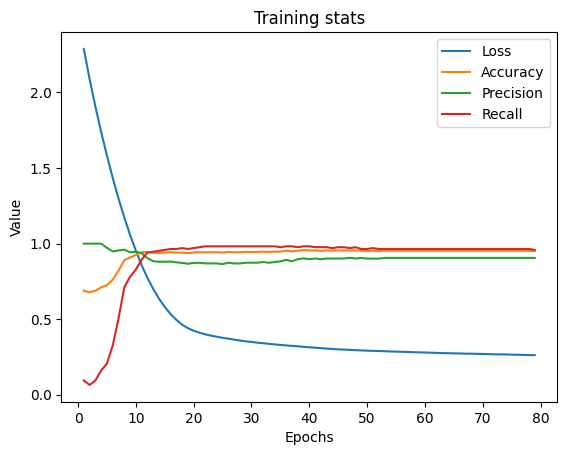

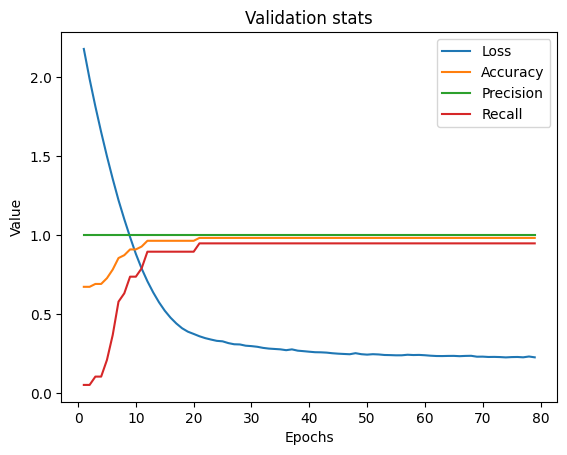

In [20]:
model = None

epochs = 80
batch_size = 32
learning_rate = 0.001
classification_threshold = 0.5
metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
           tf.keras.metrics.Precision(name='precision', 
                                      thresholds=classification_threshold),
           tf.keras.metrics.Recall(name="recall",
                                   thresholds=classification_threshold)]

regularization = tf.keras.regularizers.l1(l1=0.01)

# Create a model
model = tf.keras.models.Sequential([
    feature_layer,
    tf.keras.layers.Dense(units=30, activation='relu', kernel_regularizer=regularization, input_shape=(1,)),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(units=30, activation='relu', kernel_regularizer=regularization),
#     tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=12, activation='relu', kernel_regularizer=regularization),
#     tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=metrics)

# Train the model
history = model.fit(x=train_features, y=train_labels, batch_size=batch_size, epochs=epochs,
                    shuffle=True, validation_split=0.1, verbose=2)

epochs, history = history.epoch, pd.DataFrame(history.history)

train_history = history.values[:, :4]
validation_history = history.values[:, 4:]

# Plot training stats
plt.plot(epochs[1:], train_history[1:])
plt.title('Training stats')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend(['Loss', 'Accuracy', 'Precision', 'Recall'])
plt.show()

# Plot validation stats
plt.plot(epochs[1:], validation_history[1:])
plt.title('Validation stats')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend(['Loss', 'Accuracy', 'Precision', 'Recall'])
plt.show()

# Test the model

In [21]:
model.evaluate(x=test_features, y=test_labels, batch_size=batch_size)

5/5 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.9706 - precision: 0.9608 - recall: 0.9608


[0.24618883430957794,
 0.970588207244873,
 0.9607843160629272,
 0.9607843160629272]